In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
datas = pd.read_excel('/content/data_harga_beras.xlsx')
datas.head()

,Tahun,Bulan,Kualitas Beras,Harga
0,2013,1,1,7797.63
1,2013,2,1,7773.26
2,2013,3,1,7576.27
3,2013,4,1,7420.72
4,2013,5,1,7545.40


kualitas : 1 = premium, 2 = medium, 3 = luar kualitas

In [ ]:
datas = datas.rename({"Kualitas Beras" : "kl_beras"}, axis=1)

In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tahun     339 non-null    int64  
 1   Bulan     339 non-null    int64  
 2   kl_beras  339 non-null    int64  
 3   Harga     339 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 10.7 KB


In [ ]:
datas.corr()

,Tahun,Bulan,kl_beras,Harga
Tahun,1.000000e+00,-7.839618e-02,-3.679028e-15,0.677322
Bulan,-7.839618e-02,1.000000e+00,3.126821e-17,-0.057159
kl_beras,-3.679028e-15,3.126821e-17,1.000000e+00,-0.348098
Harga,6.773222e-01,-5.715881e-02,-3.480980e-01,1.000000


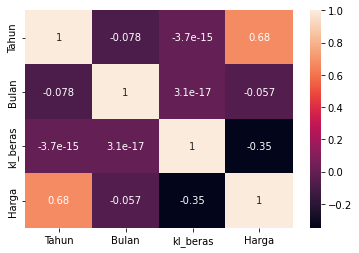

In [ ]:
sns.heatmap(datas.corr(), annot=True)

In [ ]:
X = datas.iloc[:, 0:3].values 
Y = datas.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23)

!!! UJI NORMALITAS

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

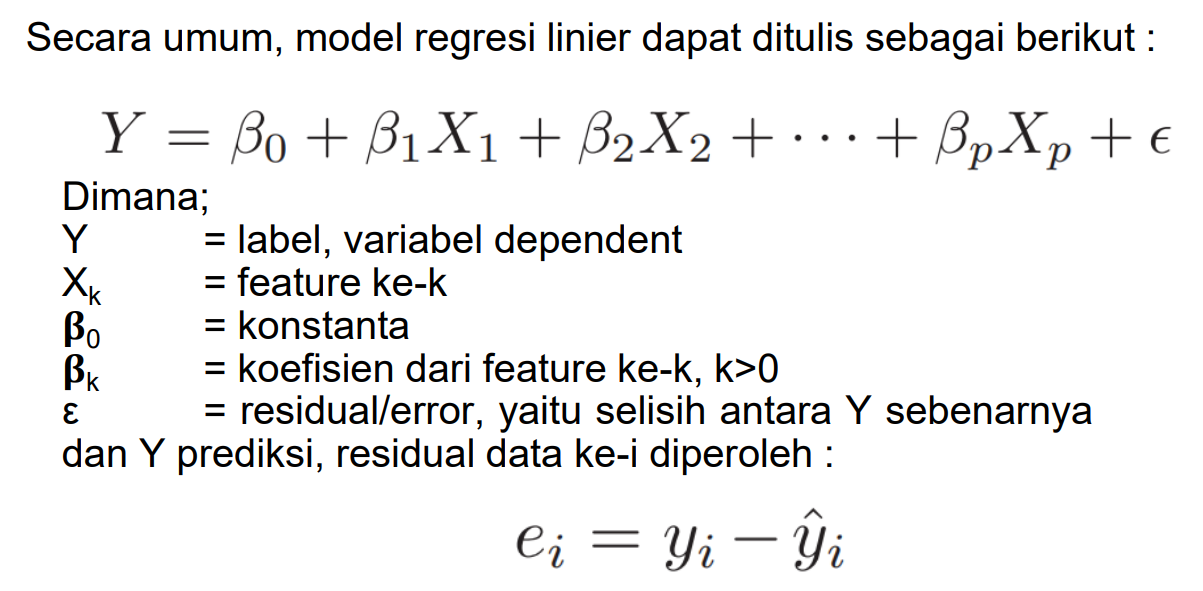

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


hasil uji Kolmogorov Smirnov 
 KstestResult(statistic=0.04839832628113405, pvalue=0.5333835559112475)


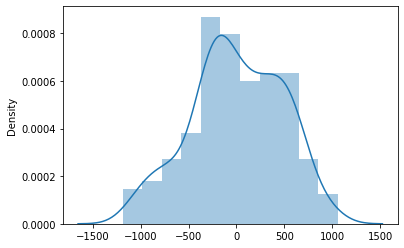

In [ ]:
y_predtrain = lin_reg.predict(X_train)
err = y_predtrain - Y_train
sns.distplot(err)

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm',)
print('hasil uji Kolmogorov Smirnov \n', norm_er)

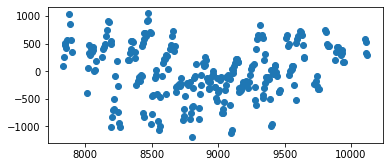

In [ ]:
#uji heteroskedastitas
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_predtrain, err)

In [ ]:
X_constant = sm.add_constant(X_train)                
linreg = sm.OLS(Y_train,X_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     123.7
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.13e-50
Time:                        06:54:17   Log-Likelihood:                -2055.9
No. Observations:                 271   AIC:                             4120.
Df Residuals:                     267   BIC:                             4134.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.567e+05   2.14e+04    -16.642      0.000   -3.99e+05   -3.14e+05
x1           181.5445     10.621     17.093      0.000     160.633     202.456
x2            -6.0527      8.660     -0.699      0.485     -23.104      10.998
x3          -297.3933     36.254     -8.203      0.000    -368.773    -226.013
==============================================================================
Omnibus:                        6.672   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                4.852
Skew:                           0.201   Prob(JB):                       0.0884
Kurtosis:                       2.483   Cond. No.                     1.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_predtest = lin_reg.predict(X_test)

#MSE
MSE_train = mean_squared_error(Y_train, y_predtrain)
print('Nilai MSE data training = ', MSE_train)
MSE_test = mean_squared_error(Y_test, y_predtest)
print('Nilai MSE data testing = ', MSE_test)

#RMSE
RMSE_train = np.sqrt(MSE_train)
print('Nilai RMSE data training = ', RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print('Nilai RMSE data testing = ', RMSE_test)

#MAE
MAE_train = mean_absolute_error(Y_train, y_predtrain)
print('Nilai MAE data training = ', MAE_train)
MAE_test = mean_absolute_error(Y_test, y_predtest)
print('Nilai MAE data testing = ', MAE_test)

Nilai MSE data training =  227438.18890006604
Nilai MSE data testing =  213693.9747320759
Nilai RMSE data training =  476.90480066787546
Nilai RMSE data testing =  462.2704562613491
Nilai MAE data training =  392.0608567496847
Nilai MAE data testing =  375.96163912312545


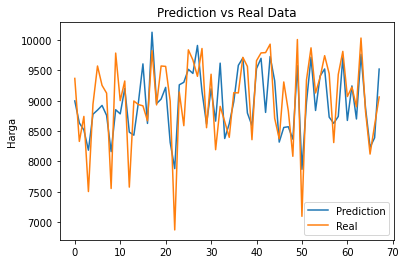

In [ ]:
plt.plot(y_predtest)
plt.plot(Y_test)

plt.title("Prediction vs Real Data")

plt.ylabel("Harga")

plt.legend(labels=["Prediction","Real"],loc = 'lower right')

In [ ]:
# Model Lasso
lasso_reg = Lasso(alpha=0.1).fit(X_train, Y_train)
y_predtrain_lasso = lasso_reg.predict(X_train)
y_predtest_lasso = lasso_reg.predict(X_test)

# Model Ridge
ridge_reg = Ridge(alpha=0.1).fit(X_train, Y_train)
y_predtrain_ridge = ridge_reg.predict(X_train)
y_predtest_ridge = ridge_reg.predict(X_test)

# Support Vectore Regression
sv_reg=SVR().fit(X_train, Y_train)
y_predtrain_svr = sv_reg.predict(X_train)
y_predtest_svr = sv_reg.predict(X_test)

# Decision Tree Regresion
dt_reg=DecisionTreeRegressor().fit(X_train, Y_train)
y_predtrain_dtr = dt_reg.predict(X_train)
y_predtest_dtr = dt_reg.predict(X_test)

In [ ]:
#MSE dengan metode lain
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(Y_train, y_predtrain))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(Y_test, y_predtest), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(Y_train, y_predtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(Y_test, y_predtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(Y_train, y_predtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(Y_test, y_predtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR = ', mean_squared_error(Y_train, y_predtrain_ridge))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(Y_test, y_predtest_ridge), '\n')

print('Nilai MSE data training Regresi DTR = ', mean_squared_error(Y_train, y_predtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(Y_test, y_predtest_dtr),'\n')

Nilai MSE data training Regresi Linier =  227438.18890006604
Nilai MSE data testing Regresi Linier =  213693.9747320759 

Nilai MSE data training Regresi Lasso =  227438.2060198032
Nilai MSE data testing Regresi Lasso =  213703.84358501236 

Nilai MSE data training Regresi Ridge =  227438.20796956526
Nilai MSE data testing Regresi Ridge =  213710.93012011284 

Nilai MSE data training Regresi SVR =  227438.20796956526
Nilai MSE data testing Regresi SVR =  213710.93012011284 

Nilai MSE data training Regresi DTR =  0.0
Nilai MSE data testing Regresi DTR =  32984.63553235294 



In [ ]:
print(f'R^2 score: {lin_reg.score(X, Y)}')
print(f'R^2 score: {lasso_reg.score(X, Y)}')
print(f'R^2 score: {ridge_reg.score(X, Y)}')
print(f'R^2 score: {sv_reg.score(X, Y)}')
print(f'R^2 score: {dt_reg.score(X, Y)}')

R^2 score: 0.5788233057147527
R^2 score: 0.5788195692100713
R^2 score: 0.578816901635161
R^2 score: -0.026404277287019662
R^2 score: 0.9875972374639633


In [ ]:
x1 = datas.iloc[10:15, 0:3].values

y_pred = lin_reg.predict(x1)
print(f"predicted response LR:\n{y_pred}")

ypred = sv_reg.predict(x1)
print(f"predicted response SVR:\n{ypred}")

predicted response LR:
[8433.75000191 8427.69733004 8196.88346295 8190.83079107 8184.77811919]
predicted response SVR:
[9061.73705665 9061.73698338 9061.7377221  9061.73764881 9061.73757553]


In [ ]:
import pickle
pd.to_pickle(lin_reg, 'model_linreg.pkl')